In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import drug2cell as d2c
import blitzgsea as blitz
#import loompy
import matplotlib as mpl

sc.settings.verbosity = 3  # verbosity: errors (0), warnings (1), info (2), hints (3)
#sc.settings.set_figure_params(dpi=80, color_map='viridis')
#sc.logging.print_versions()

In [2]:
input_file = '/lustre/scratch126/cellgen/team205/rl20/CTCL/object-new/CTCL1-8_final_portal.h5ad'
adata = sc.read_h5ad(input_file)

In [3]:
adata_sub = adata[adata.obs['broad_cell_type'].isin(['T-cell','B/Plasma'])].copy()

In [4]:
adata_sub.obs['categ'] = "Benign_T"
adata_sub.obs.loc[adata_sub.obs['anno_final']=='tumourcell', 'categ'] = 'Tumorcell'
adata_sub.obs.loc[adata_sub.obs['anno_final']=='B/plasma', 'categ'] = 'B/plasma'

In [12]:
type_con = [i + '_' +j for i, j in zip(list(adata_sub.obs['categ']), list(adata_sub.obs['donor_id']))]
adata_sub.obs['categ2'] = type_con

In [13]:
adata_sub.obs.loc[adata_sub.obs['categ']=='Benign_T', 'categ2'] = 'Benign_T'
adata_sub.obs.loc[adata_sub.obs['categ']=='B/plasma', 'categ2'] = 'B/plasma'

In [15]:
d2c.score(adata_sub, use_raw=True)

/home/jovyan/my-conda-envs/myenv_old/lib/python3.7/site-packages/drug2cell/__init__.py:208: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata.uns['drug2cell'] = anndata.AnnData(scores, obs=adata.obs)


In [15]:
adata_sub.uns['drug2cell']

AnnData object with n_obs × n_vars = 147881 × 2385
    obs: 'sample_id', 'donor_id', 'Tissue', 'n_genes', 'percent_mito', 'n_counts', 'broad_cell_type', 'anno', 'anno_final', 'categ', 'categ2'
    var: 'genes', 'all_genes'
    obsm: 'X_pca', 'X_pca_back', 'X_umap'

In [19]:
sc.tl.rank_genes_groups(adata_sub.uns['drug2cell'], groupby = 'categ', method = 'wilcoxon')

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:35)


In [40]:
result = adata_sub.uns['drug2cell'].uns['rank_genes_groups']
groups = result['names'].dtype.names
markers = pd.DataFrame(
{group + '_' + key[:1]: result[key][group]
    for group in groups for key in ['names', 'pvals_adj', 'logfoldchanges']})
markers.head(10)
markers.to_csv('drug2cell_DEGs_tumourcell_Bcell_donor_Others.csv')

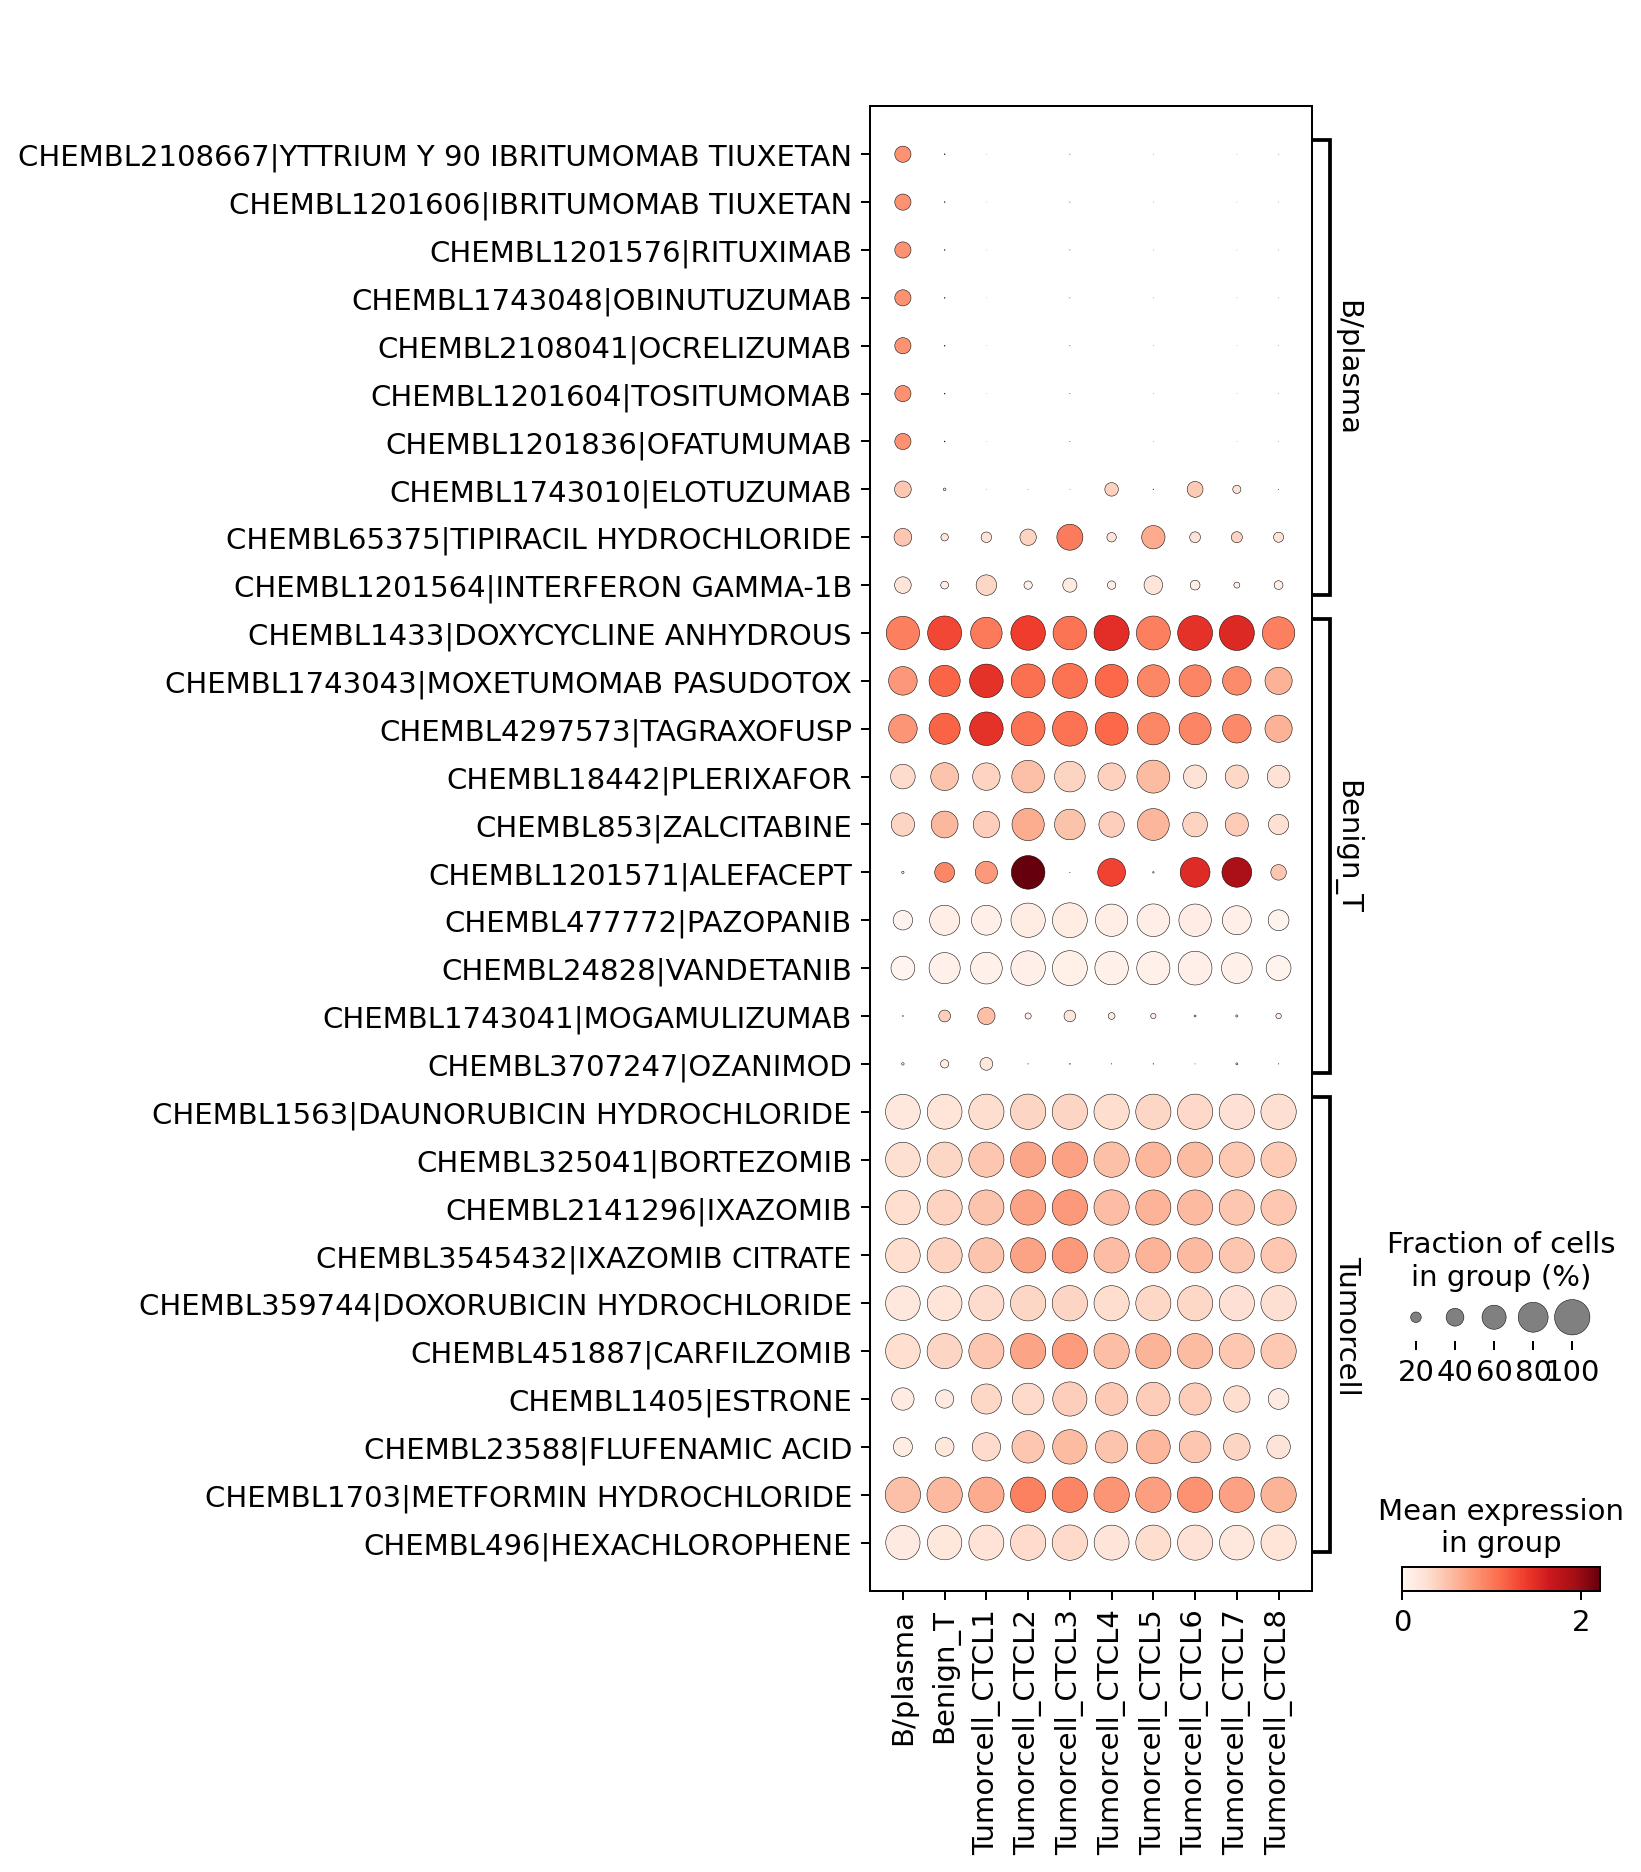

In [20]:
sc.pl.rank_genes_groups_dotplot(adata_sub.uns['drug2cell'], swap_axes=True, dendrogram=False, n_genes=10, groupby = 'categ2')

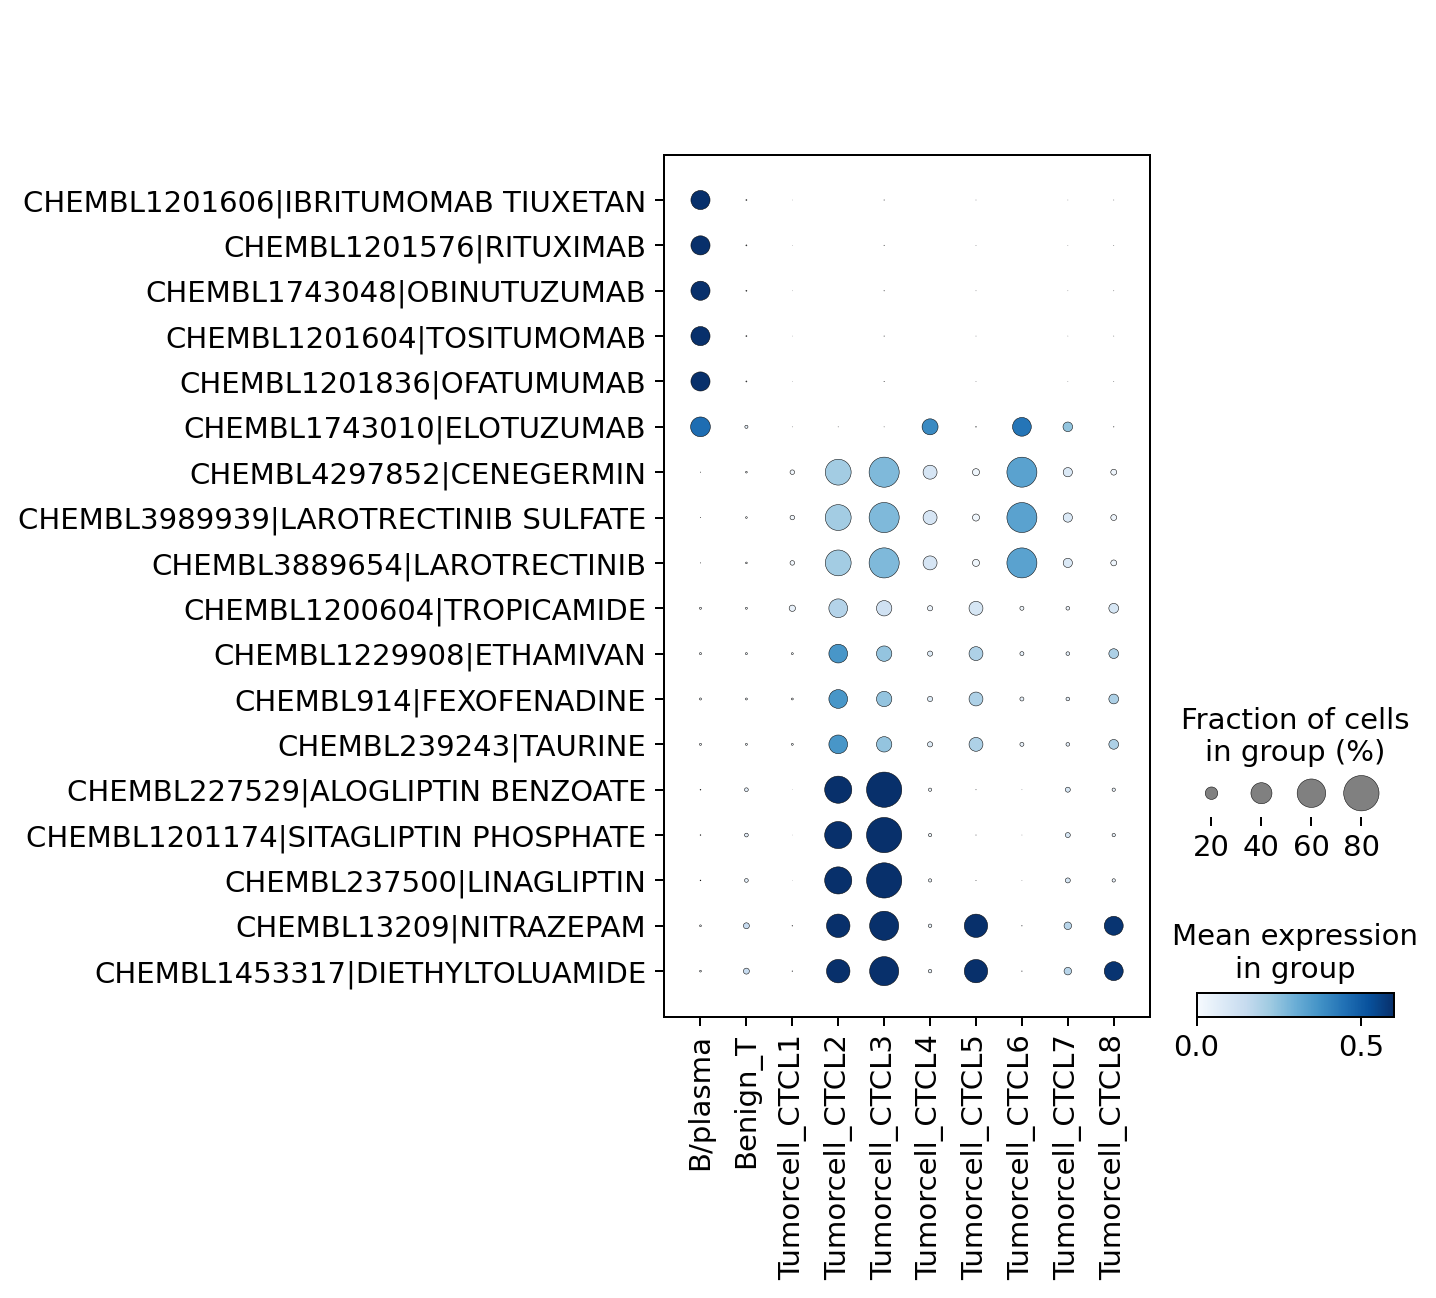

In [67]:
#categories_order = ['Others_Healthy','Others_AD','Others_Psoriasis','Others_CTCL','tumourcell_CTCL']

var_names = ['CHEMBL1201606|IBRITUMOMAB TIUXETAN','CHEMBL1201576|RITUXIMAB','CHEMBL1743048|OBINUTUZUMAB','CHEMBL1201604|TOSITUMOMAB',
             'CHEMBL1201836|OFATUMUMAB','CHEMBL1743010|ELOTUZUMAB','CHEMBL4297852|CENEGERMIN','CHEMBL3989939|LAROTRECTINIB SULFATE',
             'CHEMBL3889654|LAROTRECTINIB','CHEMBL1200604|TROPICAMIDE','CHEMBL1229908|ETHAMIVAN','CHEMBL914|FEXOFENADINE',
             'CHEMBL239243|TAURINE','CHEMBL227529|ALOGLIPTIN BENZOATE','CHEMBL1201174|SITAGLIPTIN PHOSPHATE','CHEMBL237500|LINAGLIPTIN',
             'CHEMBL13209|NITRAZEPAM', 'CHEMBL1453317|DIETHYLTOLUAMIDE']
sc.pl.rank_genes_groups_dotplot(adata_sub.uns['drug2cell'], var_names=var_names, swap_axes=True, dendrogram=False, groupby = 'categ2',
                                cmap = 'Blues', vmax=0.6, save = '.pdf')
